In [146]:
from os import listdir
from os.path import isfile, join
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
import codecs
mypath ="/Anaconda/blogs"
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from time import time
import sys
import scipy.sparse as sp
import pylab as pl
import cPickle
import sqlite3
%matplotlib inline

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
with open('MultiNB.pkl', 'rb') as fid:
    NB_loaded = cPickle.load(fid)

In [149]:
print NB_loaded

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


In [150]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("Scrape-Amazon\\amazon\\Book.db")
df = pd.read_sql_query("SELECT * from Review", con)

# verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

   id             rid              rname         pid  \
0   1  R3A9TW37U9J9C3    College Stealth  0385535597   
1   2   REDTPL6B4HNHN      Connor Gibson  0385535597   
2   3   RB04JM6NDDGFL            Panda31  0385535597   
3   4  R37N2QMX2MYD5T  WhatIThinkAboutIt  006219867X   
4   5  R16ENI6A3DH1DN                Dan  0385535597   

                                              review  
0  This book is a hard read; not because of Lexil...  
1  This book is rapidly making waves, after the N...  
2  An enthralling and comprehensive story of the ...  
3  My 3-year-old loves Pete the Cat books and is ...  
4  This is the most exhaustive, best researched, ...  


In [151]:
df.head()

,id,rid,rname,pid,review
0,1,R3A9TW37U9J9C3,College Stealth,0385535597,This book is a hard read; not because of Lexil...
1,2,REDTPL6B4HNHN,Connor Gibson,0385535597,"This book is rapidly making waves, after the N..."
2,3,RB04JM6NDDGFL,Panda31,0385535597,An enthralling and comprehensive story of the ...
3,4,R37N2QMX2MYD5T,WhatIThinkAboutIt,006219867X,My 3-year-old loves Pete the Cat books and is ...
4,5,R16ENI6A3DH1DN,Dan,0385535597,"This is the most exhaustive, best researched, ..."


In [152]:
reviews = df['review'].tolist()

In [153]:
with open('TFIDF_Vectorizer.pkl', 'rb') as fid:
    Vect_loaded = cPickle.load(fid)

In [154]:
Review_Vectorized = Vect_loaded.transform(reviews)

In [155]:
print Review_Vectorized.shape

(10879, 586663)


In [156]:

print("Predicting the outcomes of the testing set")
t0 = time()
pred = NB_loaded.predict(Review_Vectorized)
print("done in %fs" % (time() - t0))
print pred

Predicting the outcomes of the testing set
done in 0.029000s
[3 3 2 ..., 2 2 2]


In [158]:
print "Number of Reviewrs in Age group: 13-17",np.sum(np.array(pred)==1)
print "Number of Reviewrs in Age group: 17-33",np.sum(np.array(pred)==2)
print "Number of Reviewrs in Age group: 33 - ",np.sum(np.array(pred)==3)
pred = np.array(pred)
AgeFrame = pd.DataFrame(data=pred,columns=['Age'])
ages = []
for a in AgeFrame['Age']:
    if a == 1:
        ages.append('13-17') 
    elif a==2:
        ages.append('17-33')
    else:
        ages.append('33-90')
AgeFrame['Ages']=ages   
AgeFrame.head()

Number of Reviewrs in Age group: 13-17 250
Number of Reviewrs in Age group: 17-33 8605
Number of Reviewrs in Age group: 33 -  2024


,Age,Ages
0,3,33-90
1,3,33-90
2,2,17-33
3,2,17-33
4,3,33-90


In [159]:
import seaborn as sns
sns.set(style="white")

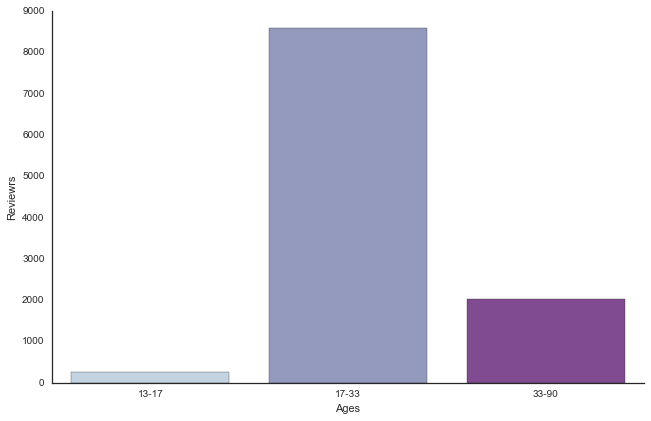

In [160]:
years = ["13-17","17-33","33-90"]
g = sns.factorplot(x="Ages", data=AgeFrame, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=1)
g.set_ylabels("Reviewrs")
g.savefig('Reviewrs_Age')

In [161]:
with open('MultinomialNB.pkl', 'rb') as fid:
    NB_loaded = cPickle.load(fid)

In [162]:
with open('TFIDF_Age_Vectorizer.pkl', 'rb') as fid:
    Vect_loaded = cPickle.load(fid)

In [163]:
Review_Vectorized = Vect_loaded.transform(reviews)

In [164]:

print("Predicting the outcomes of the testing set")
t0 = time()
Gender = NB_loaded.predict(Review_Vectorized)
print("done in %fs" % (time() - t0))
print Gender


Predicting the outcomes of the testing set
done in 0.018000s
['male' 'male' 'male' ..., 'female' 'female' 'male']


In [165]:
GenderFrame = pd.DataFrame(data=Gender,columns=['Gender'])

In [166]:
GenderFrame.head()

,Gender
0,male
1,male
2,male
3,female
4,male


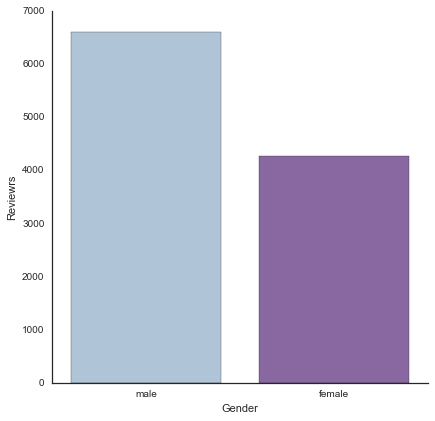

In [167]:
years = ['male','female']
g = sns.factorplot(x="Gender", data=GenderFrame, kind="count",
                   palette="BuPu", size=6, aspect=1, order=years)
g.set_xticklabels(step=1)
g.set_ylabels("Reviewrs")
g.savefig('Reviewrs_Gender')

In [168]:
Combined_dataFrame = pd.DataFrame(data=AgeFrame.join(GenderFrame))
     

In [169]:
Combined_dataFrame.head()

,Age,Ages,Gender
0,3,33-90,male
1,3,33-90,male
2,2,17-33,male
3,2,17-33,female
4,3,33-90,male


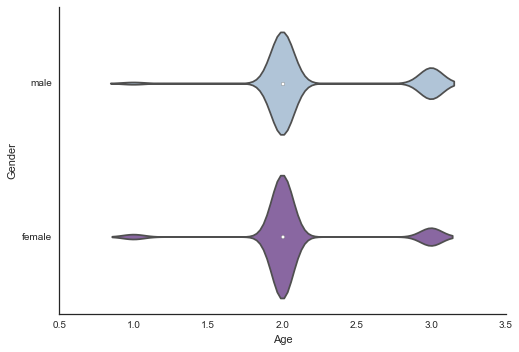

In [170]:
sns.violinplot(Combined_dataFrame['Age'], Combined_dataFrame['Gender'],palette="BuPu", size=8, aspect=2.0) #Variable Plot
sns.despine()